In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [47]:
train = pd.read_csv('/kaggle/input/2021-ai-w3-p1/train.csv')
test = pd.read_csv('/kaggle/input/2021-ai-w3-p1/test.csv')

In [48]:
import torch
import torch.optim as optim

torch.manual_seed(1)

In [49]:
x_train = torch.Tensor(np.array(train)[:,1:-1])
y_train = torch.Tensor(np.array(train)[:,-1])
x_test = torch.Tensor(np.array(test)[:,1:])

In [50]:
x_train.size()

In [51]:
# 모델 초기화
W = torch.zeros((4,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [52]:
W, b

In [53]:
# optimizer 설정
optimizer = optim.Adam([W, b], lr=0.001)


[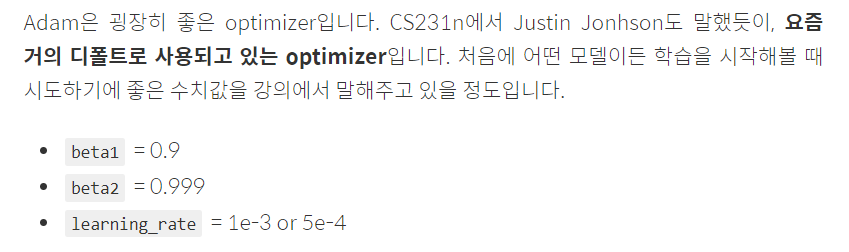](http://)

In [54]:
nb_epochs=1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # Matrix 연산!!
    hypothesis = x_train.matmul(W) + b # or .mm or @
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [55]:
predict = x_test.matmul(W) + b

In [60]:
sub = pd.read_csv('/kaggle/input/2021-ai-w3-p1/submit_sample.csv')

In [61]:
sub['Expected'] = predict.detach().numpy() 

In [62]:
sub

In [63]:
sub.to_csv("/kaggle/working/predict_adam.csv", index=False)